# Performing EDA on Data Science professionals Salaries

## Importing libraries required for data exploration and getting the Dataset

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

In [46]:
file_path = "../data/ds/Data_Science_Fields_Salary_Categorization.csv"
df = pd.read_csv(file_path)
df

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50
...,...,...,...,...,...,...,...,...,...,...
602,603,2022,Data Engineer,SE,FT,"12,253,703.00",US,US,M,100
603,604,2022,Data Engineer,SE,FT,"10,025,757.00",US,US,M,100
604,605,2022,Data Analyst,SE,FT,"10,264,466.00",US,US,M,0
605,606,2022,Data Analyst,SE,FT,"11,935,425.00",US,US,M,100


In [47]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,NaN,NaN,NaN,304.0,175.370085,1.0,152.5,304.0,455.5,607.0
Working_Year,607.0,NaN,NaN,NaN,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
Designation,607,50,Data Scientist,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Experience,607,4,SE,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment_Status,607,4,FT,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary_In_Rupees,607,369,"7,956,950.00",15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employee_Location,607,57,US,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company_Location,607,50,US,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company_Size,607,3,M,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Remote_Working_Ratio,607.0,NaN,NaN,NaN,70.92257,40.70913,0.0,50.0,100.0,100.0,100.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            607 non-null    int64 
 1   Working_Year          607 non-null    int64 
 2   Designation           607 non-null    object
 3   Experience            607 non-null    object
 4   Employment_Status     607 non-null    object
 5   Salary_In_Rupees      607 non-null    object
 6   Employee_Location     607 non-null    object
 7   Company_Location      607 non-null    object
 8   Company_Size          607 non-null    object
 9   Remote_Working_Ratio  607 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 47.6+ KB


## Observations
- There are 607 values and all columns have non-null values.
- working_year is a categorical variable but represented in integers. Need to change it to object.
- salary in rupeed should be float variable but is represented as object. Need to change to float.
- Also Remote working ratio is a categorical variable, so lets convert that to object as well.

## Performing First Cleaning on data

In [49]:
df["Working_Year"] = df["Working_Year"].astype(str)
df["Salary_In_Rupees"] = df["Salary_In_Rupees"].str.replace(",", "")
df["Salary_In_Rupees"] = df["Salary_In_Rupees"].astype(float)
df["Remote_Working_Ratio"] = df["Remote_Working_Ratio"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            607 non-null    int64  
 1   Working_Year          607 non-null    object 
 2   Designation           607 non-null    object 
 3   Experience            607 non-null    object 
 4   Employment_Status     607 non-null    object 
 5   Salary_In_Rupees      607 non-null    float64
 6   Employee_Location     607 non-null    object 
 7   Company_Location      607 non-null    object 
 8   Company_Size          607 non-null    object 
 9   Remote_Working_Ratio  607 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 47.6+ KB


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,3.040000e+02,1.753701e+02,1.0,152.5,304.0,455.5,607.0
Salary_In_Rupees,607.0,8.935485e+06,5.646034e+06,227489.0,4991076.0,8081874.0,11935425.0,47741700.0


## Observations
- Minimum salary world wide is around 2.30 lakhs.
- Maximum salary world wide in around 4.7 crores.
- Looking at the distribution it feels like either the minimum or the maximum might be outliers. Need to check the box plot to invetigate further.

In [51]:
def plot_hist_box( df, title):
    print(title)
    print("Skew : ", round(df["Salary_In_Rupees"].skew(), 2))
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)  # No.of Rows is 1 number of columns is 2 and index is 1
    df["Salary_In_Rupees"].hist(bins=10, grid=False) # Shows the histogram in first graph
    plt.ylabel = "Count"
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df["Salary_In_Rupees"])  # Shows the box plot in sencond graph.
    plt.show()

Salary in Rupees
Skew :  1.67


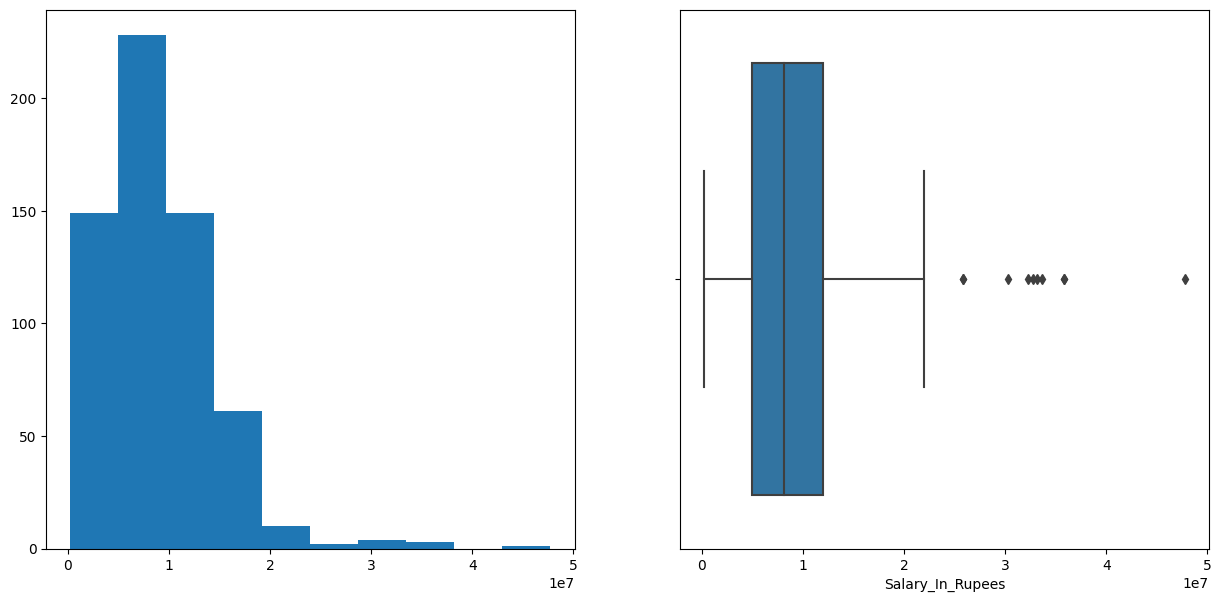

In [52]:
plot_hist_box(df, "Salary in Rupees")

## Observations
- The histogram shows that salary is skewed towards the right. Maximum salaries are in range of 70 Lakhs. 
- There are outliers or to say very few people with very high salary. 
- We need to check where these outlier people work and information about them to make an informed decision whether to remove them from consideration.

In [53]:
df_outliers = df[df["Salary_In_Rupees"] > 20000000]
percentage_of_outliers = (len(df_outliers)/ len(df)) * 100
print("Outliers")
print(len(df_outliers))
print(percentage_of_outliers)
df_outliers

Outliers
16
2.6359143327841847


,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
1,2,2020,Machine Learning Scientist,SE,FT,20688070.0,JP,JP,S,0
25,26,2020,Director of Data Science,EX,FT,25860088.0,US,US,L,100
33,34,2020,Research Scientist,MI,FT,35806275.0,US,US,M,0
63,64,2020,Data Scientist,SE,FT,32782634.0,US,US,L,100
78,79,2021,ML Engineer,MI,CT,21483765.0,US,US,L,100
93,94,2021,Lead Data Engineer,SE,FT,21961182.0,US,US,L,0
97,98,2021,Financial Data Analyst,MI,FT,35806275.0,US,US,L,100
157,158,2021,Applied Machine Learning Scientist,MI,FT,33657899.0,US,US,L,50
225,226,2021,Principal Data Scientist,EX,CT,33100912.0,US,US,S,100
231,232,2021,ML Engineer,SE,FT,20369792.0,US,US,S,100


## Observations
- Most of these high salaried Data Scientists are from US and are at either Executive Level or are seniors with high expertise.
- The percentage of these people is 2 percent.
- If we remove these people, will our dataset be balanced? Lets Check that out.

Salary in Rupees
Skew :  0.33


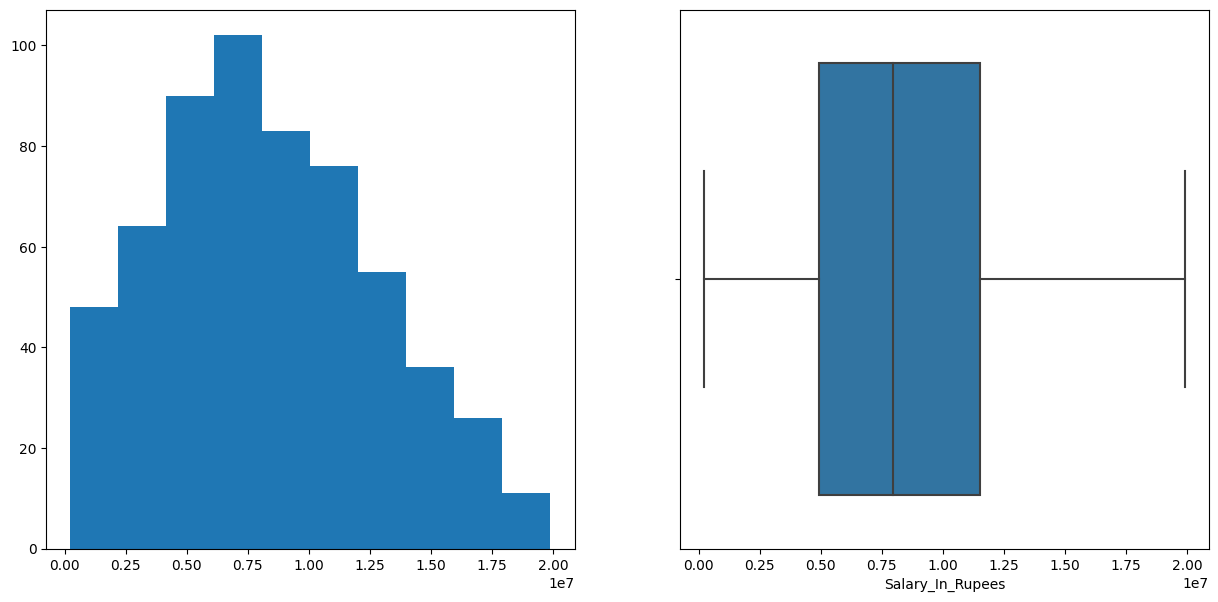

In [54]:
plot_hist_box(df[df["Salary_In_Rupees"] < 20000000], "Salary in Rupees")

## Observations
- The dataset looks balanced with removal of outliers but still the skew is towards right.
- The mean being around 80 lakhs.
- We can use this dataset to find next round of insights.

In [55]:
df_scrubbed = df[df["Salary_In_Rupees"] < 20000000]

# Univariate Analysis on categorical variables of interest

Unique Countries: ['DE' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'JP' 'PL' 'PT' 'CN' 'GR'
 'AE' 'NL' 'MX' 'CA' 'AT' 'NG' 'PH' 'ES' 'DK' 'RU' 'IT' 'HR' 'BG' 'SG'
 'BR' 'IQ' 'VN' 'BE' 'UA' 'MT' 'CL' 'RO' 'IR' 'CO' 'MD' 'KE' 'SI' 'HK'
 'TR' 'RS' 'PR' 'LU' 'JE' 'CZ' 'AR' 'DZ' 'TN' 'MY' 'EE' 'AU' 'BO' 'IE'
 'CH']


<Axes: xlabel='Employee_Location', ylabel='count'>

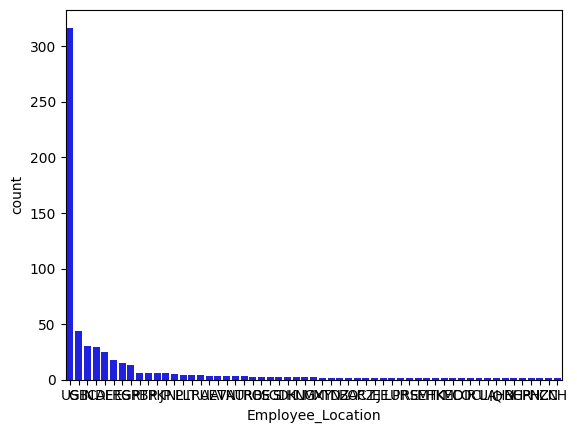

In [56]:
print("Unique Countries:", df_scrubbed["Employee_Location"].unique())
figure = plt.plot(figsize=(100, 20))
sns.countplot(x="Employee_Location", data=df_scrubbed, color="blue",
              order=df_scrubbed["Employee_Location"].value_counts().index)

In [60]:
# Getting the top 10 countries:
df_scrubbed["Employee_Location"].value_counts()[: 10]

Employee_Location
US    317
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
PT      6
BR      6
Name: count, dtype: int64

### Taking Employee location where at least 10 employees are featured

In [63]:
v_counts = df_scrubbed["Employee_Location"].value_counts()
df_ten_plus_employees = df_scrubbed[df_scrubbed["Employee_Location"].isin(v_counts.index[v_counts.gt(10)])]
df_ten_plus_employees["Employee_Location"].unique()

array(['DE', 'GB', 'US', 'FR', 'IN', 'GR', 'CA', 'ES'], dtype=object)

10 Plus employees from a country whats the distribution
Skew :  0.25


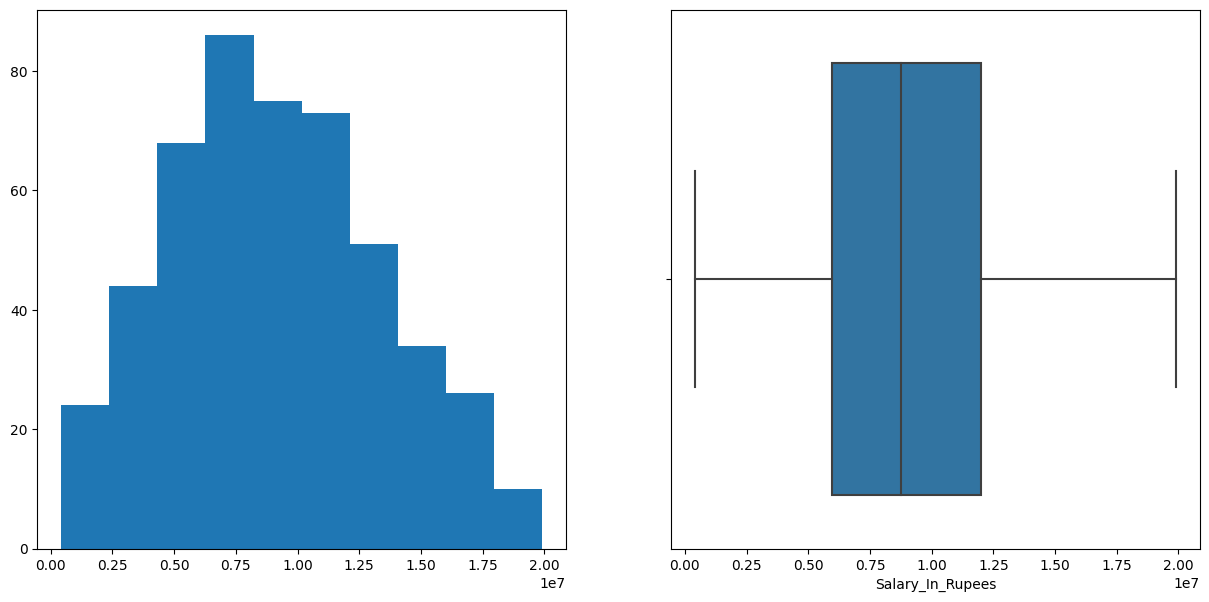

In [66]:
plot_hist_box(df_ten_plus_employees, "10 Plus employees from a country whats the distribution")

Bar plot for categorical variables of interest in the scrubbed dataset


<Axes: xlabel='Employment_Status', ylabel='count'>

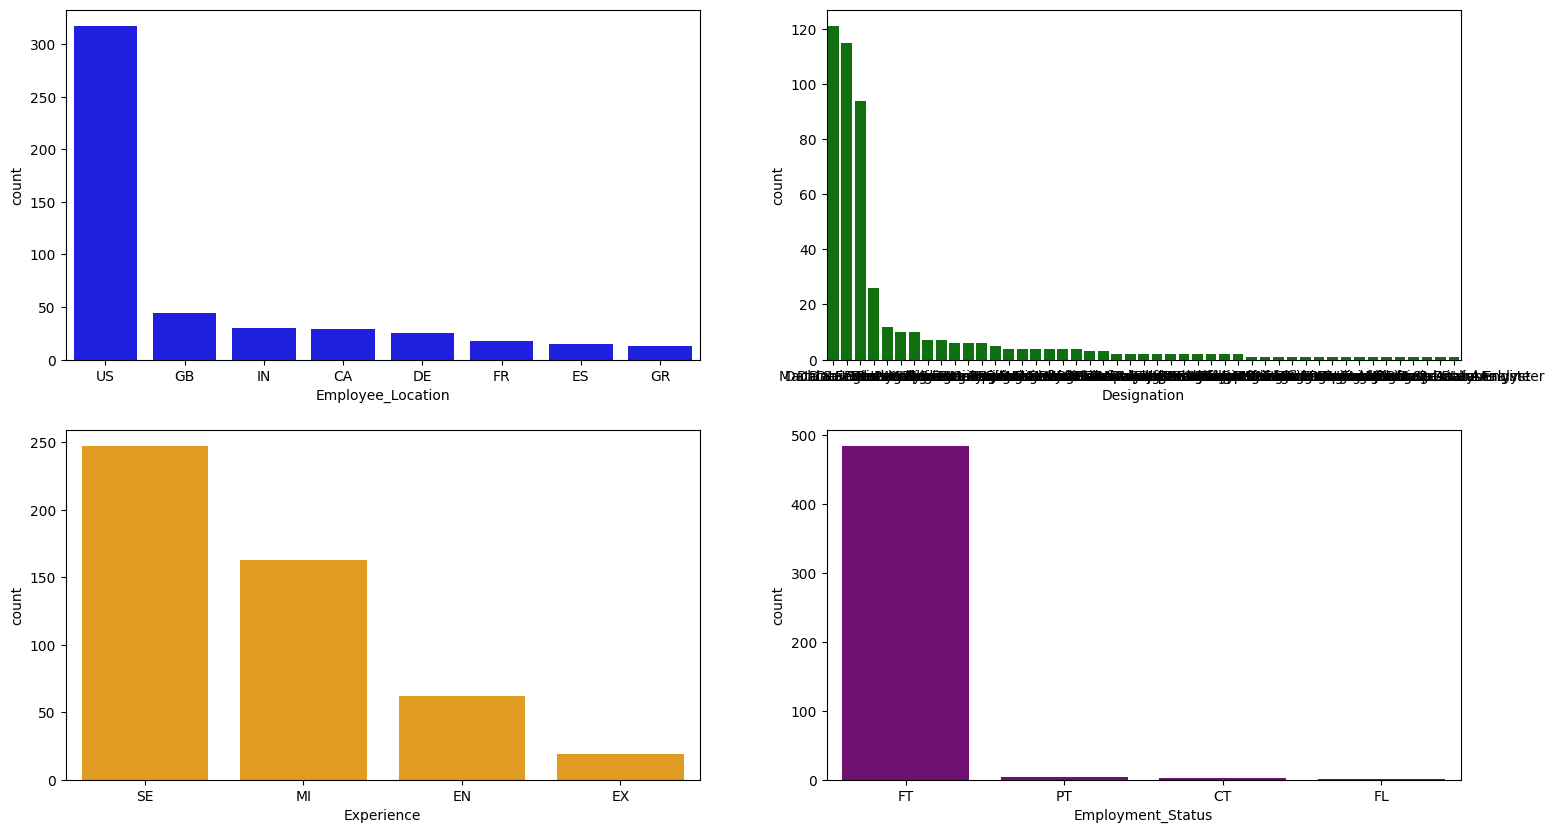

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

print("Bar plot for categorical variables of interest in the scrubbed dataset")

sns.countplot(ax=axes[0, 0], x = "Employee_Location", data=df_ten_plus_employees, color="blue", 
              order=df_ten_plus_employees["Employee_Location"].value_counts().index)
sns.countplot(ax=axes[0, 1], x="Designation", data=df_ten_plus_employees, color="green",
              order=df_ten_plus_employees["Designation"].value_counts().index)
sns.countplot(ax=axes[1, 0], x="Experience", data=df_ten_plus_employees, color="orange",
              order=df_ten_plus_employees["Experience"].value_counts().index)
sns.countplot(ax=axes[1, 1], x="Employment_Status", data=df_ten_plus_employees, color="purple",
              order=df_ten_plus_employees["Employment_Status"].value_counts().index)

## Observations
- We can see most of the data scientists are located in US followed by Great Britan followed by India, Canada and European countries.
- Senior Engineers form the majority.
- Fulltimers make almost 90 - 95 % of the demography.
- Top 5 designations make up around 85 - 90% of the data scientists.

## Let us Analyse Indian Data Scientists

In [67]:
df_Indian = df_scrubbed[df_scrubbed["Employee_Location"] == "IN"]
df_Indian

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
11,12,2020,Data Scientist,MI,FT,3221053.0,IN,IN,L,0
18,19,2020,Data Science Consultant,EN,FT,454103.0,IN,IN,M,50
21,22,2020,Product Data Analyst,MI,FT,483146.0,IN,IN,L,100
50,51,2020,Data Analyst,EN,FT,483146.0,IN,IN,S,0
73,74,2021,BI Data Analyst,EX,FT,11935425.0,IN,US,L,100
77,78,2021,3D Computer Vision Researcher,MI,PT,430391.0,IN,IN,M,50
92,93,2021,Lead Data Analyst,MI,FT,1560278.0,IN,IN,L,100
94,95,2021,Data Scientist,EN,FT,2367272.0,IN,IN,L,50
109,110,2021,Data Engineer,EN,FT,2421141.0,IN,IN,L,100
127,128,2021,Data Scientist,MI,FT,753205.0,IN,IN,S,0


Indian Data Scientists Salary Distribution
Skew :  2.54


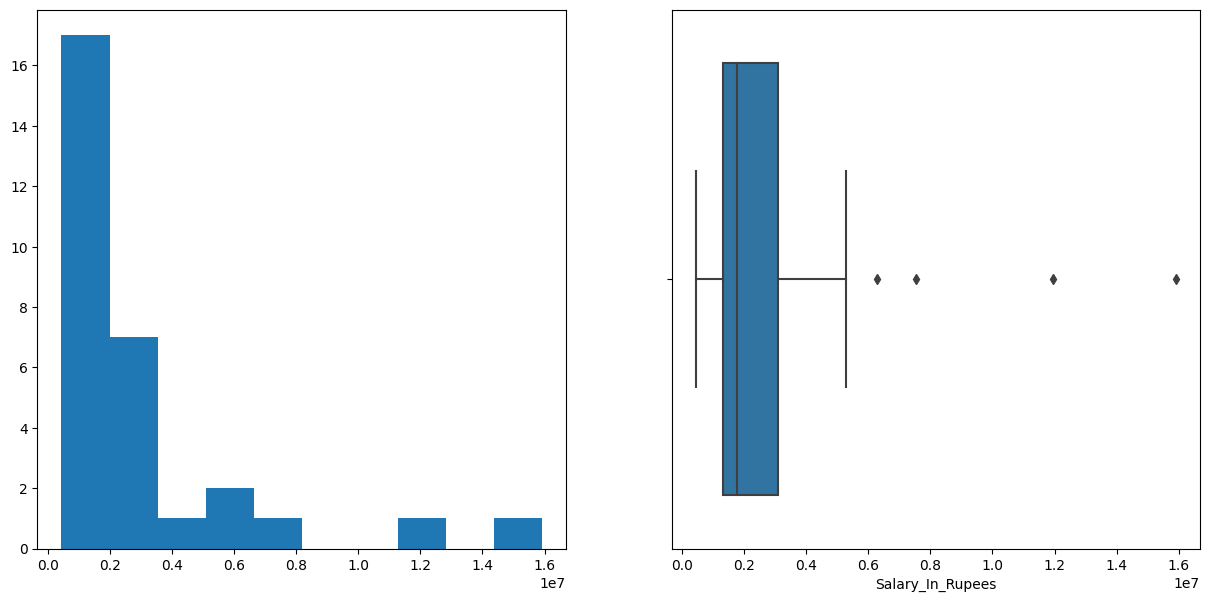

In [68]:
plot_hist_box(df_Indian, "Indian Data Scientists Salary Distribution")

In [69]:
df_Indian["Designation"].value_counts()

Designation
Data Scientist                   9
Machine Learning Engineer        3
Big Data Engineer                3
Data Engineer                    2
Data Science Manager             2
AI Scientist                     2
Data Science Consultant          1
Product Data Analyst             1
Data Analyst                     1
BI Data Analyst                  1
3D Computer Vision Researcher    1
Lead Data Analyst                1
Lead Data Scientist              1
Head of Machine Learning         1
Business Data Analyst            1
Name: count, dtype: int64

In [70]:
df_Indian["Experience"].value_counts()

Experience
MI    12
EN    11
SE     5
EX     2
Name: count, dtype: int64

In [71]:
df_Indian["Company_Size"].value_counts()

Company_Size
L    17
M     7
S     6
Name: count, dtype: int64

In [72]:
df_Indian["Company_Location"].value_counts()

Company_Location
IN    24
US     4
CH     1
AS     1
Name: count, dtype: int64

## Observations
- Most of the Indian Data Scientists are either Entry level or Mid Level.
- The salary of these data scientists is mostly concentrated between 4 lakhs to 40 Lakhs.
- The most popular designation is Data Scientist.
- Almost all of them are fulltimers.
- Most of the companies hiring data scientists are Large Companies, headquartered in India.